# Statistical Tests

In [4]:
#Reading in packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from plotnine import *
from sklearn.linear_model import LinearRegression
from statsmodels.genmod.generalized_linear_model import GLM
from scipy.stats import spearmanr

In [5]:
#Reading in data
all_wine = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/all_wine.csv")

## Analyzing the difference in the pH acidity between White and Red wine

/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


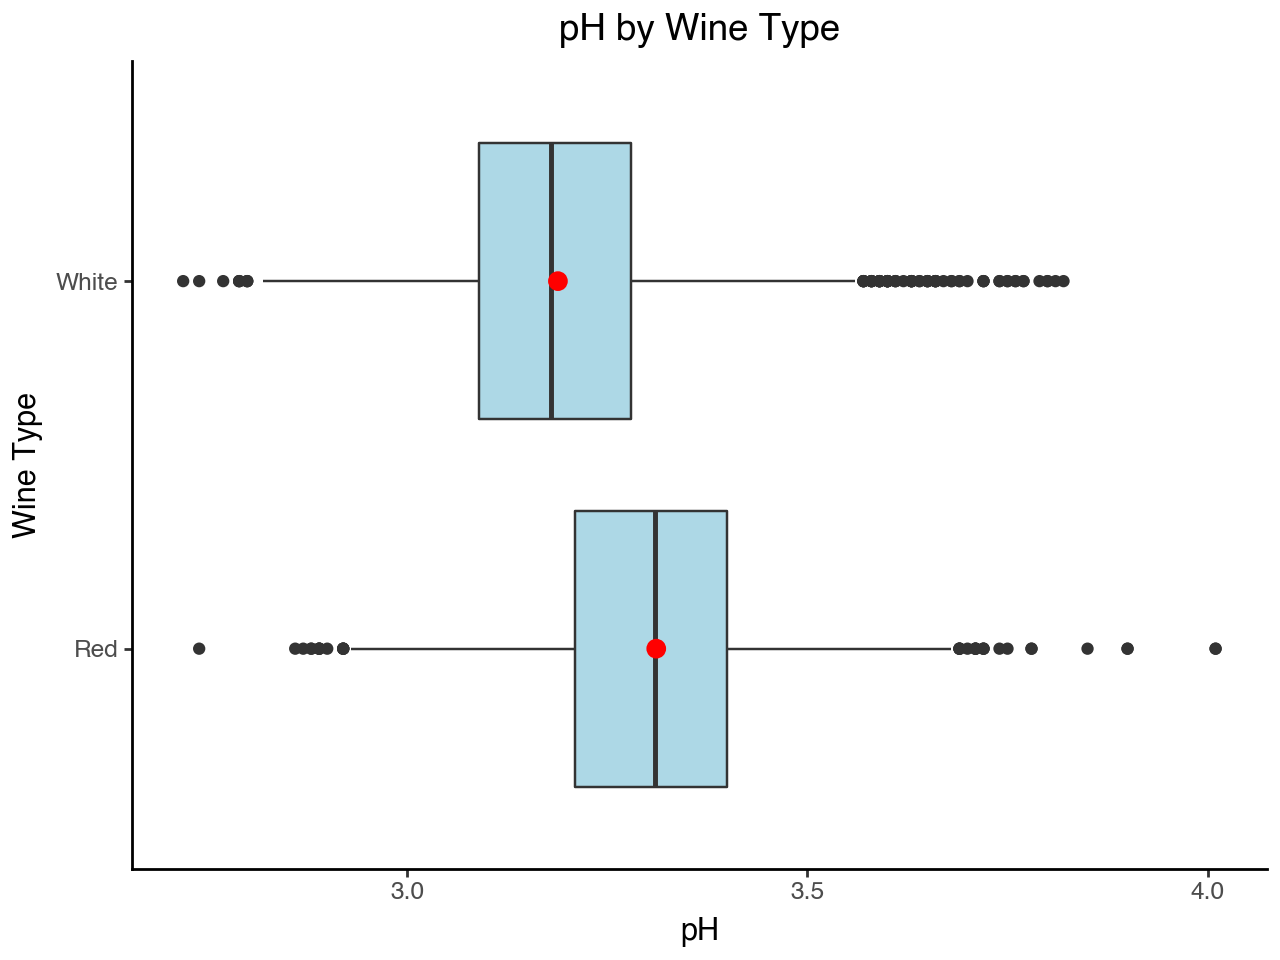

In [6]:
#Plotting box-plots of fixed acidity between wine types
p = (
    ggplot(all_wine, aes(x = "Wine Type", y = "pH")) + 
    geom_boxplot(fill="lightblue") + 
    labs(title = "pH by Wine Type") + 
    stat_summary(fun_y=np.mean, geom = "point", shape="o", size = 3, color = "red", fill = "red") 
    + theme_classic() + 
    scale_fill_brewer(palette="Blues") + coord_flip()
    )
p.show()


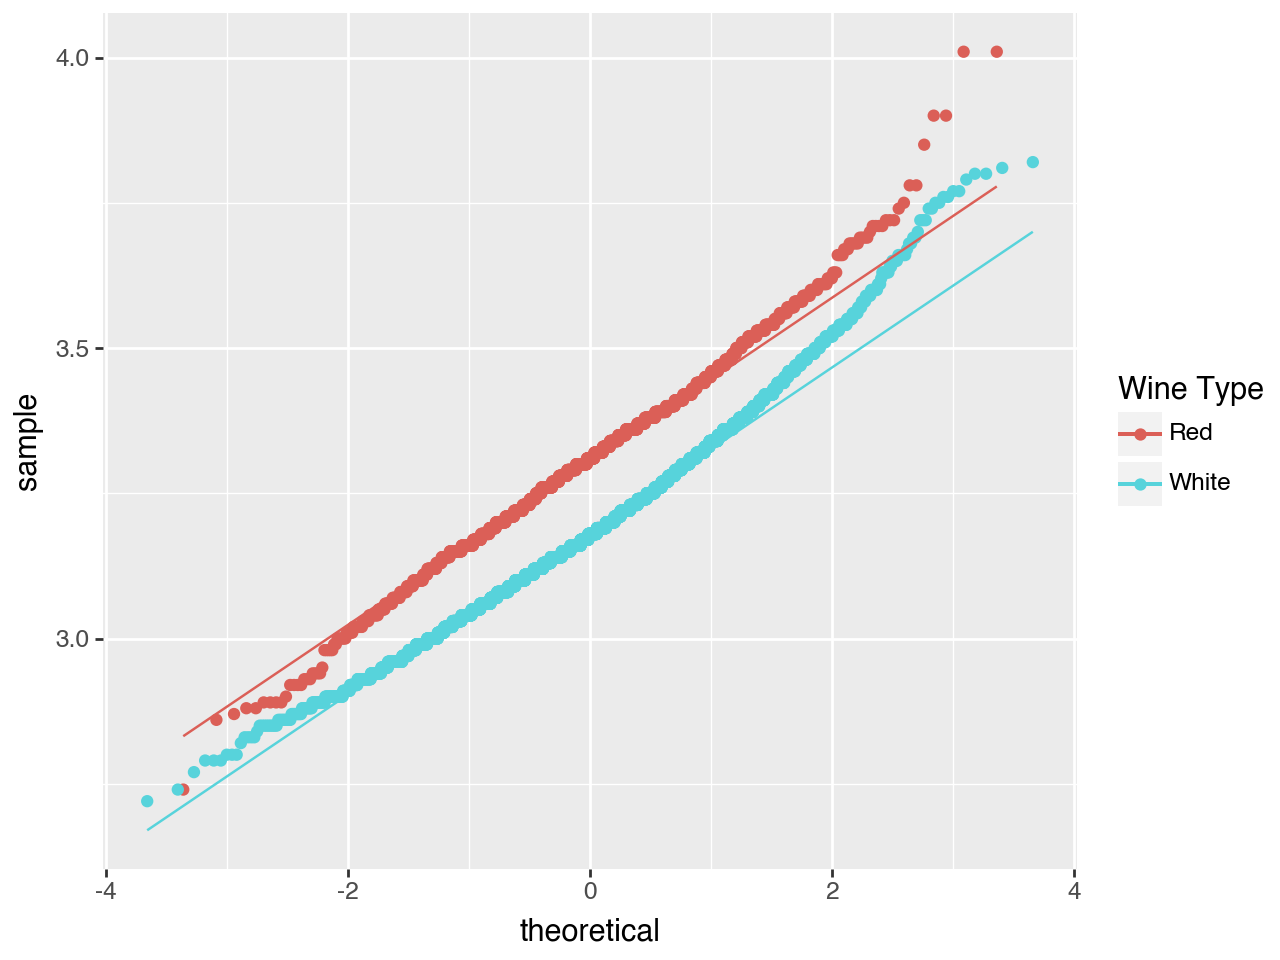

Test Statistic = 0.9935
P-value = 0.0000
Test Statistic = 0.9881
P-value = 0.0000


In [7]:
#Means looked slightly different in boxplot - Want to test this
#Must check assumptions first

#First assumption - Check for Normality
p = (
    ggplot(all_wine, aes(sample='pH', color='Wine Type')) + 
    stat_qq() + stat_qq_line()
    )
p.show()
#Looks pretty Normal, could be leptokurtic

#Performing Shapiro-Wilk Test for Normality
stat, p = stats.shapiro(all_wine[all_wine["Wine Type"] == 'Red']['pH'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")


stat, p = stats.shapiro(all_wine[all_wine["Wine Type"] == 'White']['pH'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")

#P-values less than 0.05 - tells us this is not Normal 

Levene's test statistic: 0.48164055418742224
P-value: 0.4877049714879964


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 58'. Pick better value with 'binwidth'.


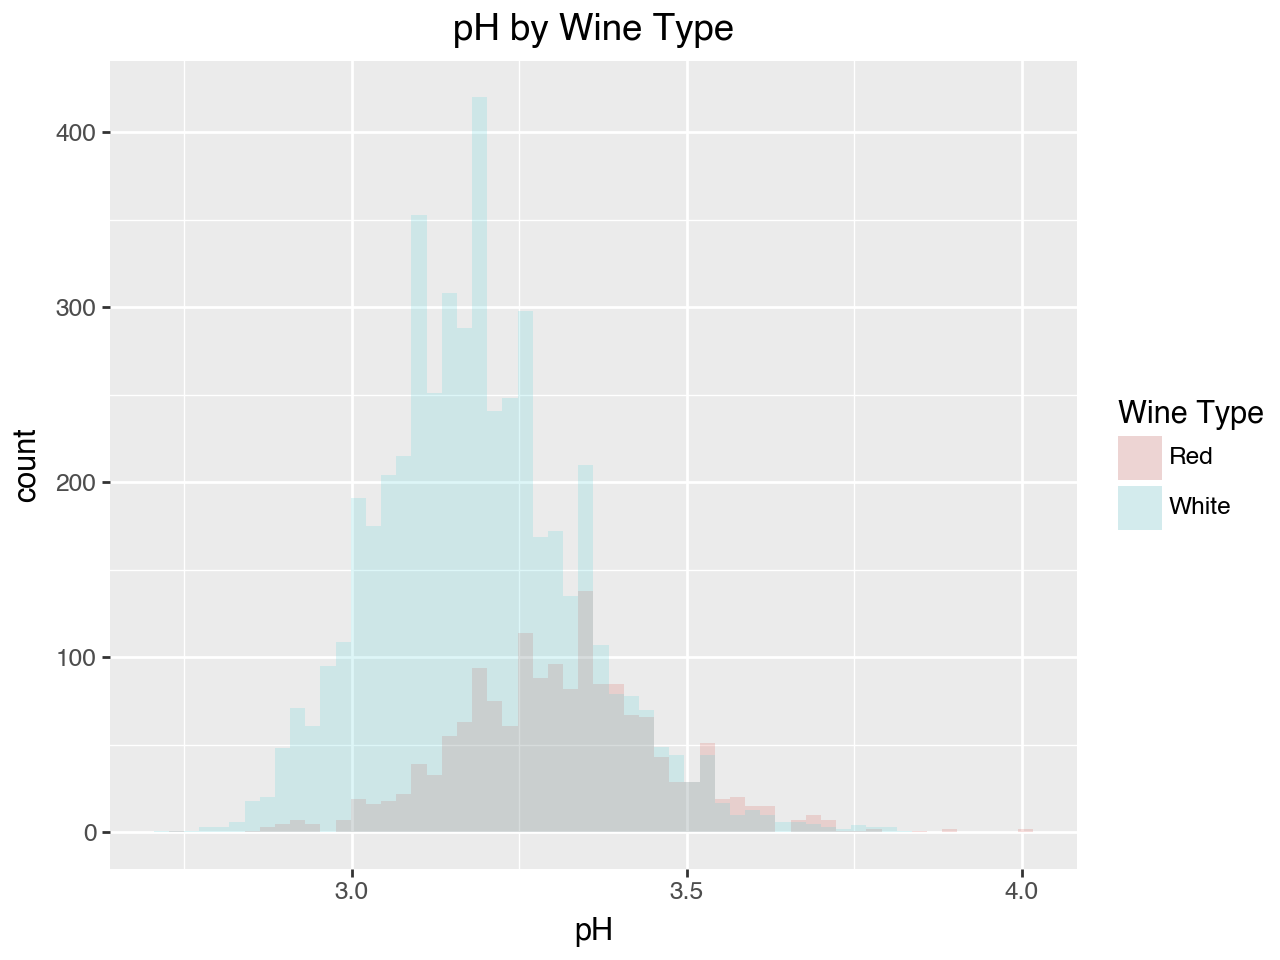

KruskalResult(statistic=735.5836478018277, pvalue=5.471117025940286e-162)

In [8]:
#Testing Variance with Levene Test
group_one = all_wine[all_wine['Wine Type']=="Red"]['pH']
group_two = all_wine[all_wine['Wine Type']=="White"]['pH']

stat, p = sp.stats.levene(group_one, group_two)
print(f"Levene's test statistic: {stat}")
print(f"P-value: {p}")
#Variances are not different

#Graphing overalid histogram to see if we have symmetry
p = (
    ggplot(all_wine,aes(x="pH", fill="Wine Type")) + 
    geom_histogram(alpha=0.2, position="identity") + 
    labs(title = "pH by Wine Type", x="pH"))
p.show()

#Both individual histograms look symmetric

#Will be testing for difference in means (identical shape, symmetric, and equal variances)


#Since we don't have Normality with pH and wine type - Will use Kruskal Wallis
sp.stats.kruskal(group_one, group_two)
#P-value is extremely small so we say there is a difference in means between the pH of White vs. Red Wine

## Analyzing the difference in alcohol level between White and Red wine

/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


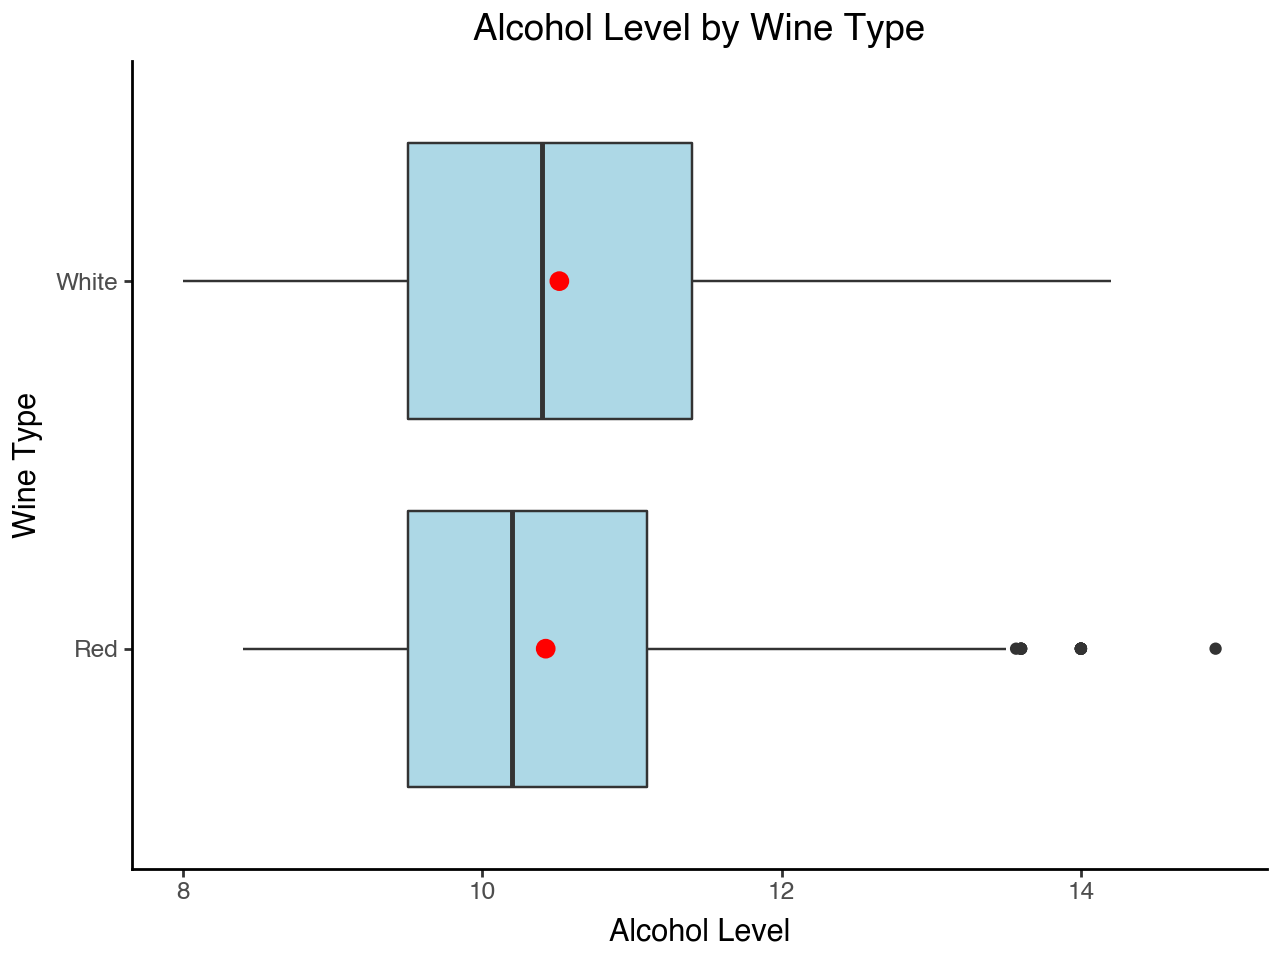

In [9]:
#Plotting box-plots of alcohol level between wine types
p = (
    ggplot(all_wine, aes(x = "Wine Type", y = "alcohol")) + 
    geom_boxplot(fill="lightblue") + 
    labs(title = "Alcohol Level by Wine Type", y="Alcohol Level") + 
    stat_summary(fun_y=np.mean, geom = "point", shape="o", size = 3, color = "red", fill = "red") 
    + theme_classic() + 
    scale_fill_brewer(palette="Blues") + coord_flip()
    )
p.show()

#Means look about the same between wine types

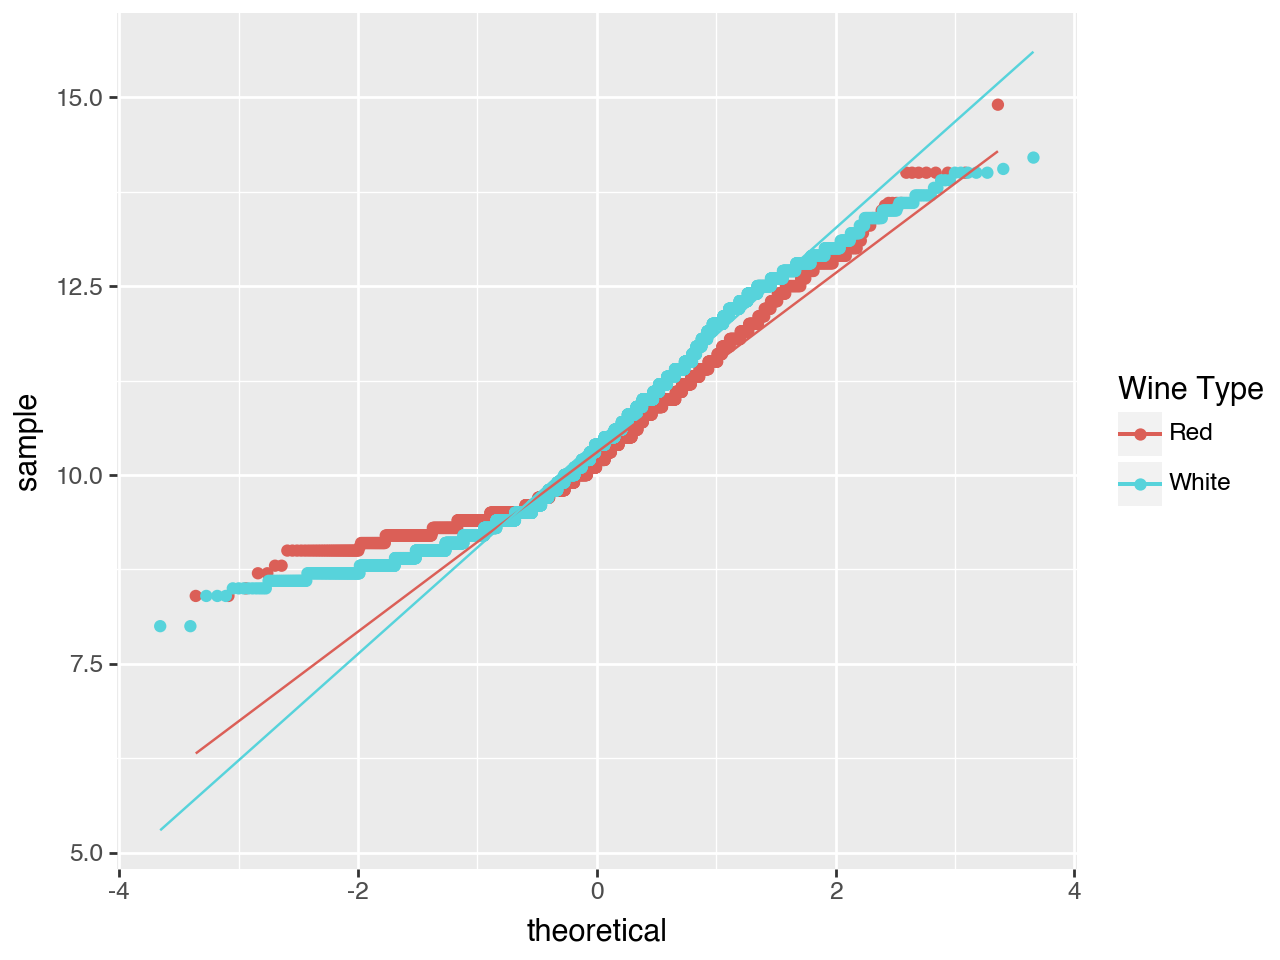

Test Statistic = 0.9288
P-value = 0.0000
Test Statistic = 0.9553
P-value = 0.0000


In [10]:
#Means look about the same - Want to test this
#Must test the assumptions first 

#First assumption - Check for Normality
p = (
    ggplot(all_wine, aes(sample='alcohol', color='Wine Type')) + 
    stat_qq() + stat_qq_line()
    )
p.show()
#Doesn't look Normal - Could be right skewed

#Performing Shapiro-Wilk Test for Normality
stat, p = stats.shapiro(all_wine[all_wine["Wine Type"] == 'Red']['alcohol'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")


stat, p = stats.shapiro(all_wine[all_wine["Wine Type"] == 'White']['alcohol'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")

#P-values less than 0.05 - tells us this is not Normal 

Levene's test statistic: 72.78461438394963
P-value: 1.7802193708236558e-17


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 36'. Pick better value with 'binwidth'.


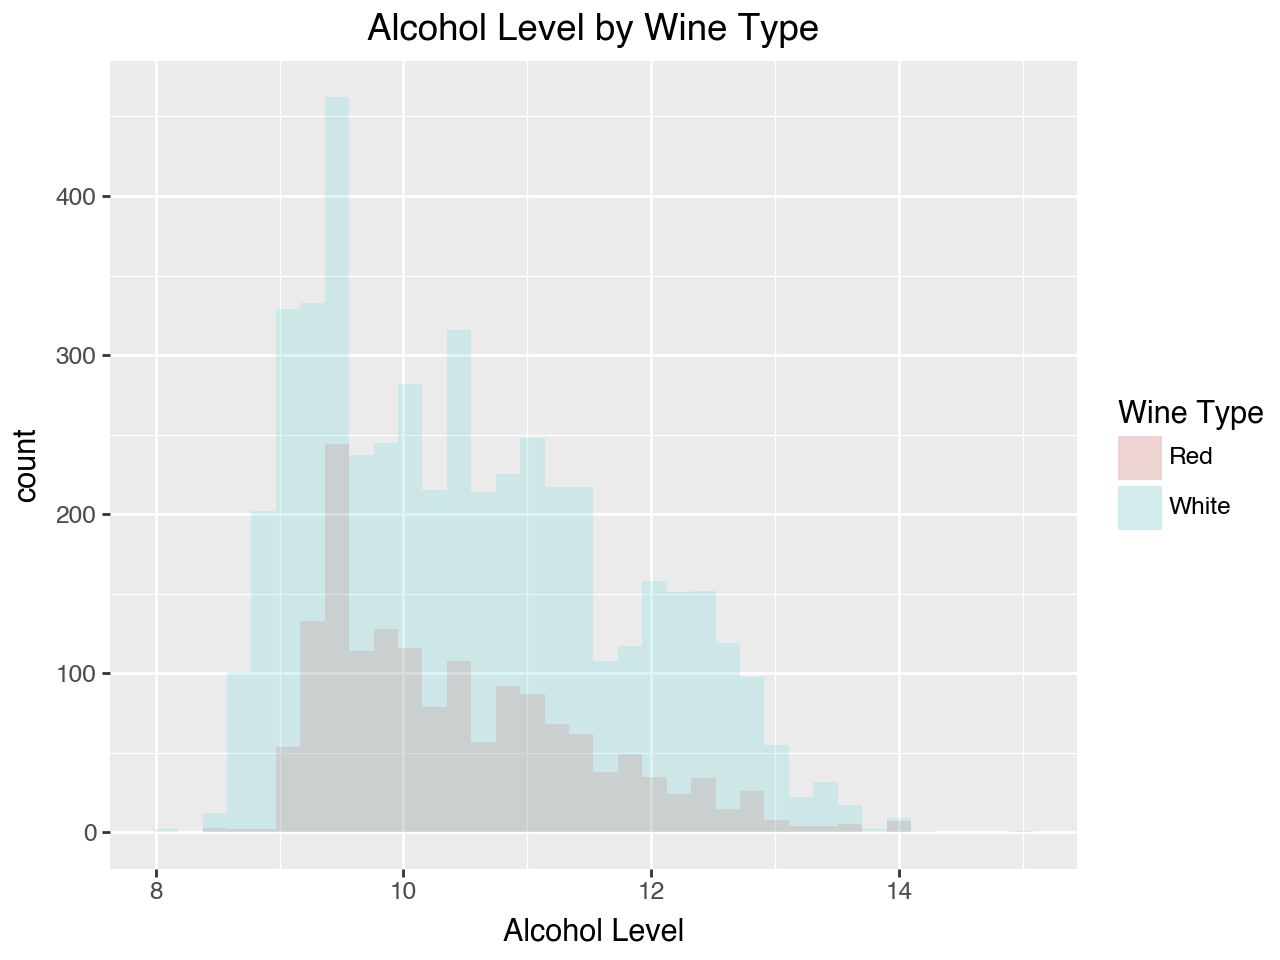

KruskalResult(statistic=1.7825000808790687, pvalue=0.1818426303500336)

In [11]:
#Testing Variance with Levene Test
group_one = all_wine[all_wine['Wine Type']=="Red"]['alcohol']
group_two = all_wine[all_wine['Wine Type']=="White"]['alcohol']

stat, p = sp.stats.levene(group_one, group_two)
print(f"Levene's test statistic: {stat}")
print(f"P-value: {p}")
#Variances are significantly different (small p-value)

#Graphing overalid histogram to see if we have symmetry
p = (
    ggplot(all_wine,aes(x="alcohol", fill="Wine Type")) + 
    geom_histogram(alpha=0.2, position="identity") + 
    labs(title = "Alcohol Level by Wine Type", x="Alcohol Level"))
p.show()
#Both individual histograms do not look symmetric, but identical in shape

#Will be testing for difference in medians (identical shape, but not symmetric)


#Since we don't have Normality with alcohol level and wine type - Will use Kruskal Wallis
sp.stats.kruskal(group_one, group_two)
#P-value is greater than 0.05 so we say there is not a difference in medians between the alcohol level of White vs. Red Wine

## Analyzing the difference in Total Sulfur Dioxide between White and Red Wine

/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


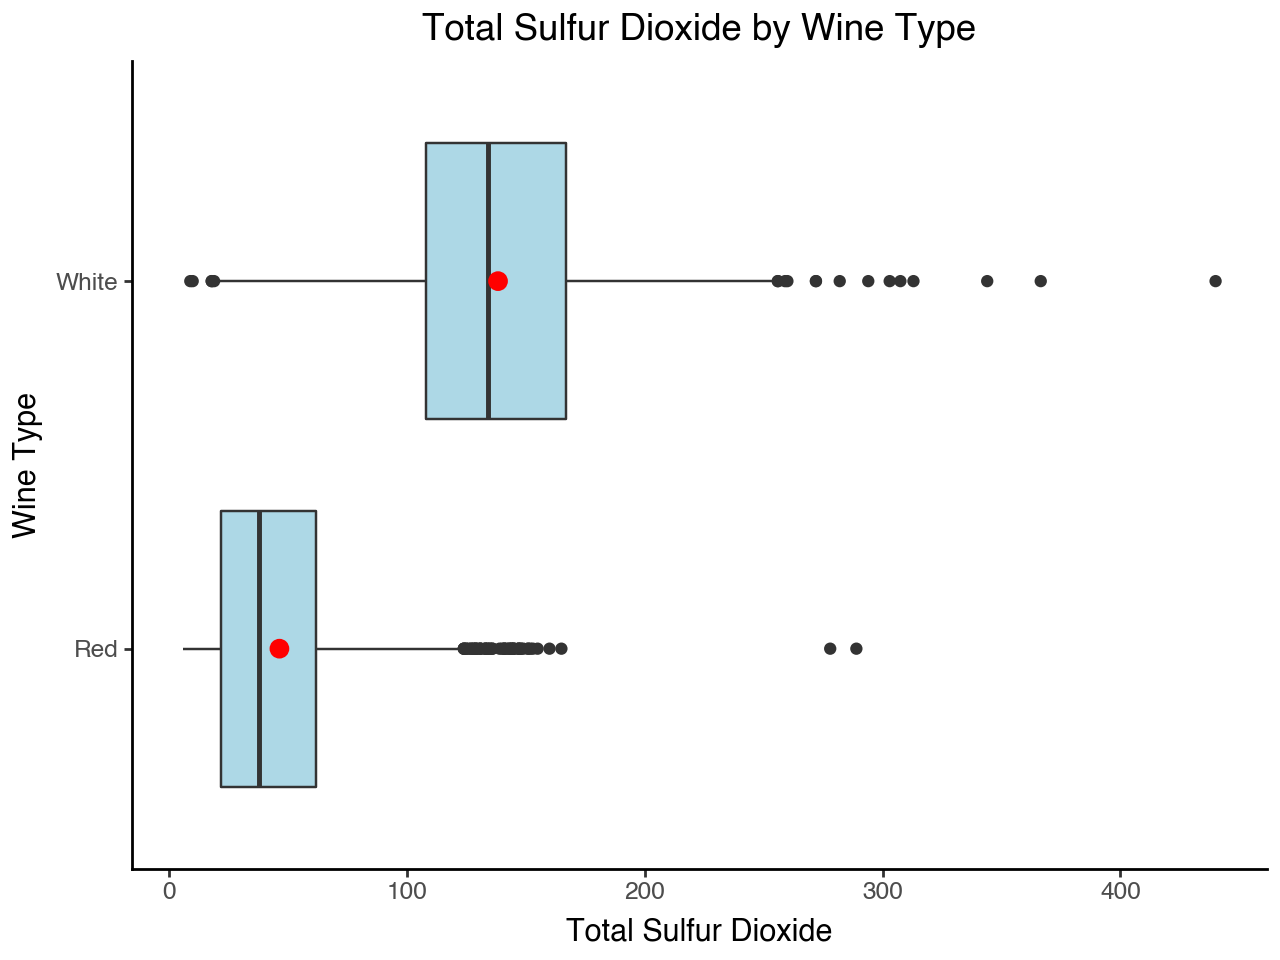

In [12]:
#Plotting box-plots of total sulfur dioxide between wine types
p = (
    ggplot(all_wine, aes(x = "Wine Type", y = "total sulfur dioxide")) + 
    geom_boxplot(fill="lightblue") + 
    labs(title = "Total Sulfur Dioxide by Wine Type", y="Total Sulfur Dioxide") + 
    stat_summary(fun_y=np.mean, geom = "point", shape="o", size = 3, color = "red", fill = "red") 
    + theme_classic() + 
    scale_fill_brewer(palette="Blues") + coord_flip()
    )
p.show()

#Means look different between wine types

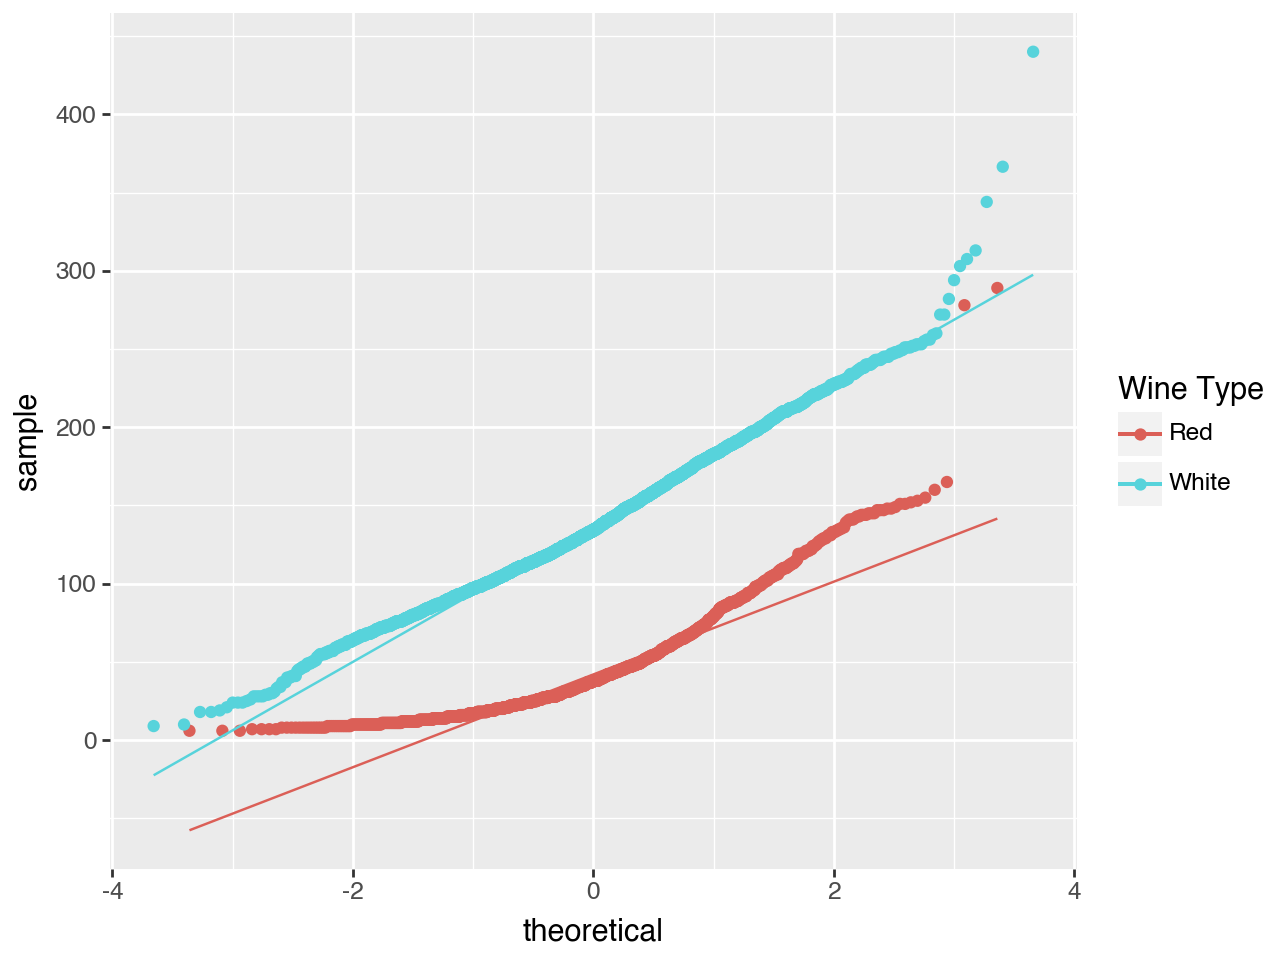

Test Statistic = 0.8732
P-value = 0.0000
Test Statistic = 0.9890
P-value = 0.0000


In [13]:
#Means look different - Want to test this
#Must test the assumptions first 

#First assumption - Check for Normality
p = (
    ggplot(all_wine, aes(sample='total sulfur dioxide', color='Wine Type')) + 
    stat_qq() + stat_qq_line()
    )
p.show()
#Doesn't look Normal - Could be right skewed

#Performing Shapiro-Wilk Test for Normality
stat, p = stats.shapiro(all_wine[all_wine["Wine Type"] == 'Red']['total sulfur dioxide'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")


stat, p = stats.shapiro(all_wine[all_wine["Wine Type"] == 'White']['total sulfur dioxide'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")

#P-values less than 0.05 - tells us this is not Normal 

Levene's test statistic: 181.381177631061
P-value: 8.506549136018727e-41


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 52'. Pick better value with 'binwidth'.


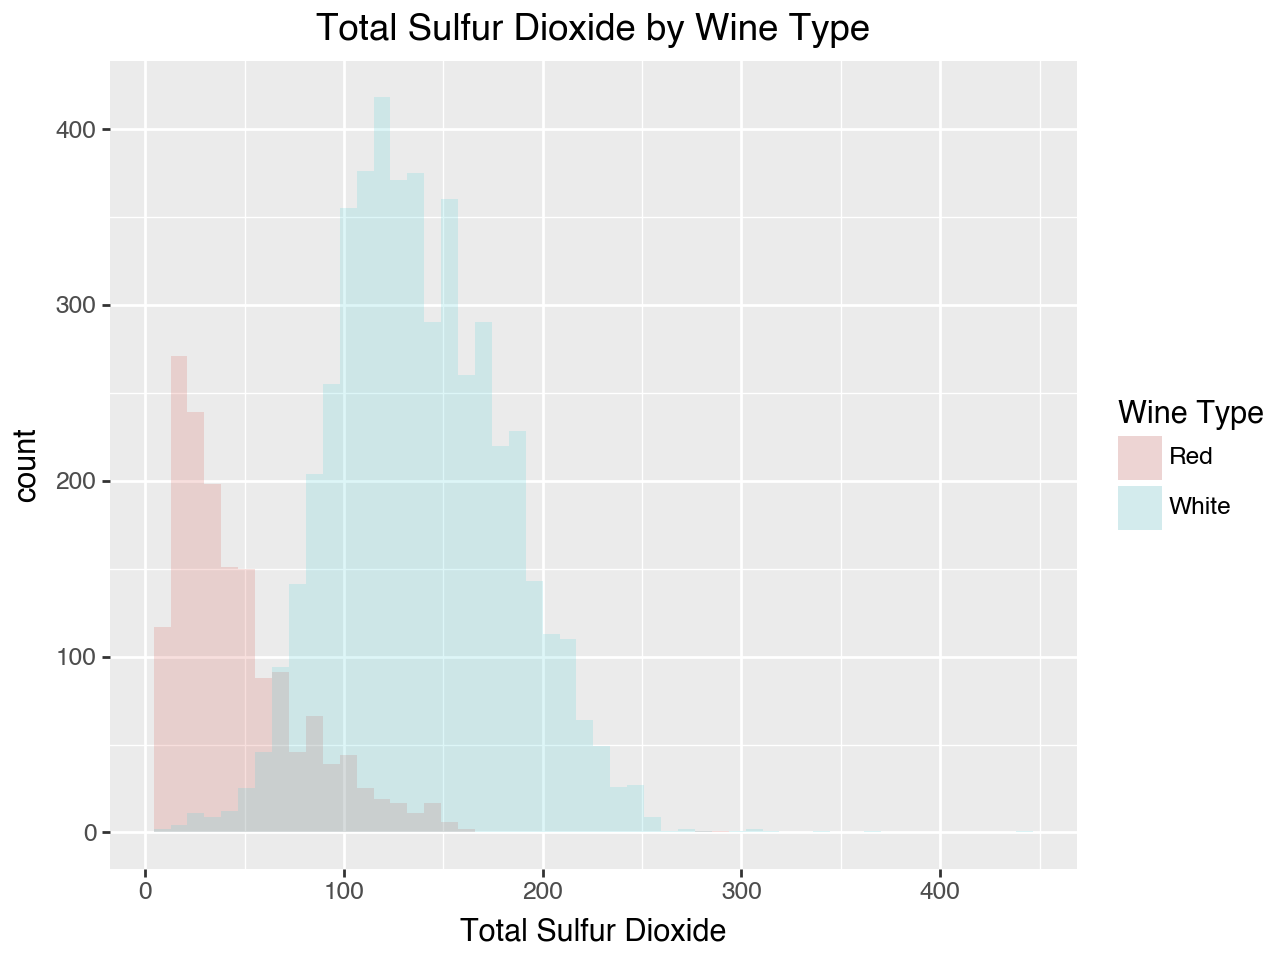

KruskalResult(statistic=2970.5495851374108, pvalue=0.0)

In [14]:
#Testing Variance with Levene Test
group_one = all_wine[all_wine['Wine Type']=="Red"]['total sulfur dioxide']
group_two = all_wine[all_wine['Wine Type']=="White"]['total sulfur dioxide']

stat, p = sp.stats.levene(group_one, group_two)
print(f"Levene's test statistic: {stat}")
print(f"P-value: {p}")
#Variances are significantly different (small p-value)

#Graphing overalid histogram to see if we have symmetry
p = (
    ggplot(all_wine,aes(x="total sulfur dioxide", fill="Wine Type")) + 
    geom_histogram(alpha=0.2, position="identity") + 
    labs(title = "Total Sulfur Dioxide by Wine Type", x="Total Sulfur Dioxide"))
p.show()
#One histogram looks symmetric, the other does not - shapes do not look identical

#Will be testing for difference in location (not symmetric and not identical shape)


#Since we don't have Normality with alcohol level and wine type - Will use Kruskal Wallis
sp.stats.kruskal(group_one, group_two)
#P-value is less than 0.05 so we say there is a difference in location between the total sulfur dioxide of White vs. Red Wine